In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from vpython import *
import pandas as pd

# see https://gist.github.com/tungwaiyip/8987366

In [3]:

def sphere_vol(d, r):
    # https://stackoverflow.com/questions/67775131/calculate-volume-of-n-ball
    return np.power(np.pi, d / 2) / gamma(d / 2 + 1) * r

def cube_vol(d, l):
    return l ** d

def entropy(p):
    return -np.sum(p * log(p)) 


print(sphere_vol(2,1))
print(cube_vol(2,2))
print(sphere_vol(3,1))
print(cube_vol(3,2))

3.141592653589793
4
4.188790204786391
8


In [4]:
dims = np.arange(1, 30)

In [5]:
sphere_vols = []
cube_vols = []
ratios = []
radius = 1
for d in dims:
    sphere_ = sphere_vol(d, radius)
    cube_ = cube_vol(d, 2*radius)
    sphere_vols.append(sphere_)
    cube_vols.append(cube_)
    ratios.append(cube_/sphere_)
    

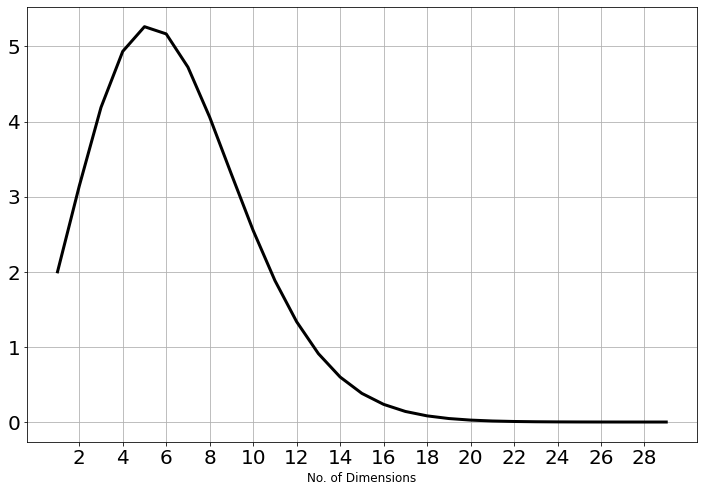

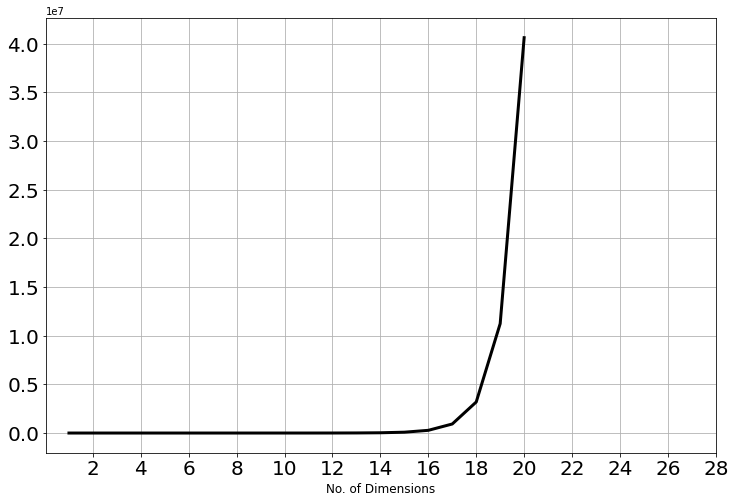

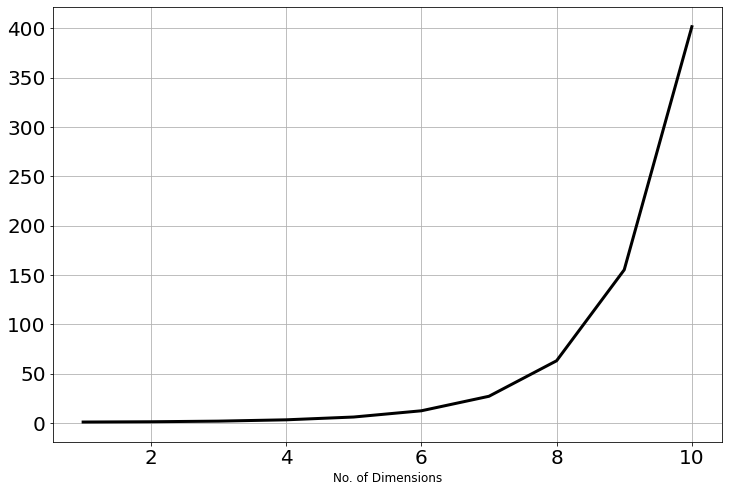

In [6]:
plt.figure(figsize=(12,8))
plt.plot(dims, sphere_vols, linewidth=3, c='k')
plt.xticks(dims[1::2])
plt.xlabel('No. of Dimensions', fontsize=12)
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('sphere_volume.png')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(dims[:20], ratios[:20], linewidth=3, c='k')
plt.xticks(dims[1::2])
plt.xlabel('No. of Dimensions', fontsize=12)
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('ratios_20.png')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(dims[:10], ratios[:10], linewidth=3, c='k')
plt.xticks(dims[:10][1::2])
plt.xlabel('No. of Dimensions', fontsize=12)
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('ratios_10.png')
plt.show()

In [7]:
# plot N_typ against eps in typicality threshold/bound

    

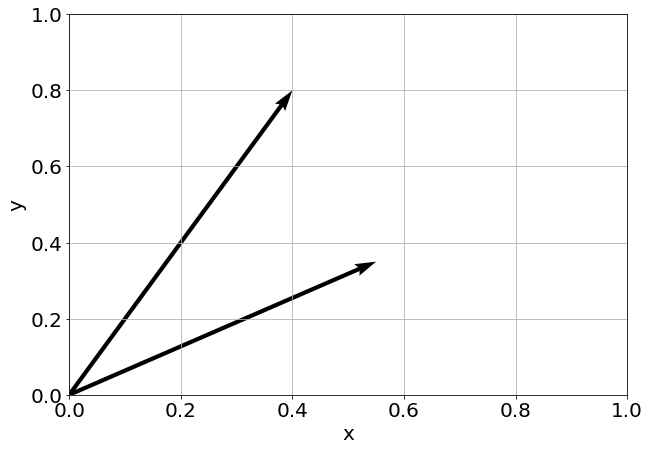

In [8]:
plt.figure(figsize=(10,7))
plt.quiver([0.4,], [0.8,], angles='xy', scale_units='xy', scale=1)
plt.quiver([0.55,], [0.35,], angles='xy', scale_units='xy', scale=1)
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('vector_lengths.png')
plt.show()

In [9]:
N = 200

dims = np.arange(0,100)

mean_lengths = []
lp = []
up = []
for d in dims:
    
    X = np.random.randn(N, d)
    lengths = np.sqrt((X**2).sum(1))
    lp.append(np.percentile(lengths, [1]))
    up.append(np.percentile(lengths,[99]))
    av_length = lengths.mean()
    mean_lengths.append(av_length)
    
relationship = np.sqrt(dims)

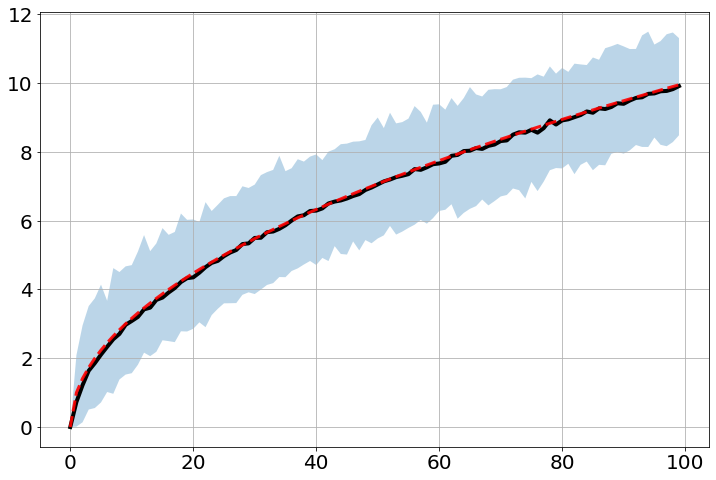

In [10]:
mean_lengths = np.asarray(mean_lengths)
lp = np.asarray(lp)
up = np.asarray(up)

plt.figure(figsize=(12,8))
plt.fill_between(dims, lp[:,0], up[:,0], alpha=.3)
plt.plot(dims, mean_lengths, linewidth=4, c='k')
plt.plot(dims, relationship, '--r', linewidth=3, alpha=0.9)
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('expected_lengths.png')
plt.show()


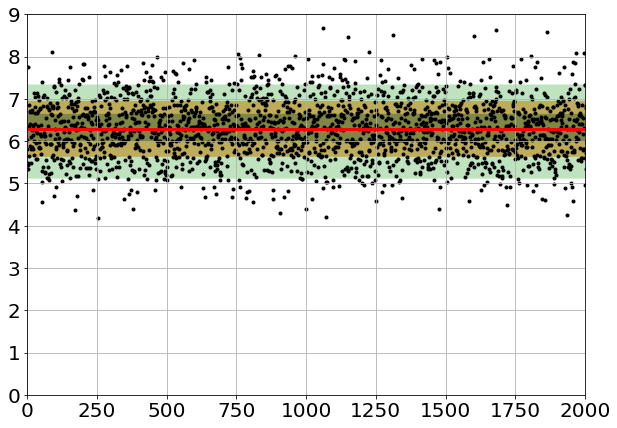

In [11]:
N = 100000

mean_lengths = []

d = 40

X = np.random.randn(N, d)
lengths = np.sqrt((X**2).sum(1))
lp=np.percentile(lengths, [1])
up=np.percentile(lengths,[99])
av_length = lengths.mean()
    
epsilon = np.array([3, 6, 10])
lo = np.sqrt(np.maximum(d - epsilon * np.log(4), 0))
hi = np.sqrt(d + epsilon * np.log(4))

plt.figure(figsize=(10,7))
plt.hlines(av_length, -50, 3000, 'r', linewidth=3)
plt.fill_between(np.arange(0, len(lengths)), lo[0], hi[0])
plt.fill_between(np.arange(0, len(lengths)), lo[1], hi[1], alpha=0.6)
plt.fill_between(np.arange(0, len(lengths)), lo[2], hi[2], alpha=0.3)
plt.scatter(np.arange(0, len(lengths)),lengths, marker='.', c='k')
plt.ylim(0,9)
plt.xlim(0,2000)
plt.grid()
plt.tick_params(labelsize=20)
plt.savefig('typicality_eps.png')
plt.show()



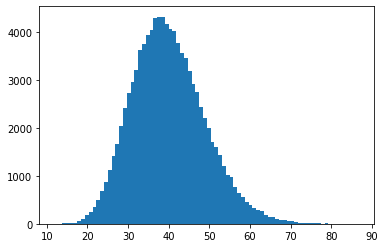

In [12]:
N = 100000

mean_lengths = []

d = 40

X = np.random.randn(N, d)
lengths = ((X**2).sum(1))
lp=np.percentile(lengths, [1])
up=np.percentile(lengths,[99])
av_length = lengths.mean()
    
epsilon = np.array([3, 6, 10])
lo = np.sqrt(np.maximum(d - epsilon * np.log(4), 0))
hi = np.sqrt(d + epsilon * np.log(4))


plt.hist(lengths, bins=80)
plt.show()

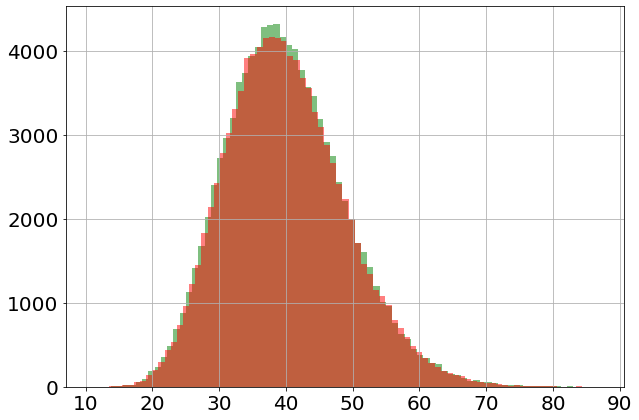

In [13]:
plt.figure(figsize=(10,7))
plt.hist(lengths, bins=80, color='g', alpha=0.5)
plt.hist(np.random.chisquare(40,100000), bins=80, color='r', alpha=0.5)
plt.grid()
plt.tick_params(labelsize=20)
plt.savefig('length_histogram.png')
plt.show()

In [14]:
# real data here: https://www.dataarchive.lissdata.nl/study_units/view/15

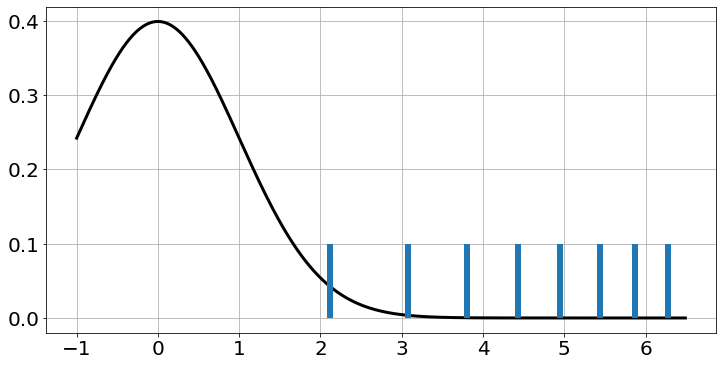

In [15]:
import scipy.stats

N = 20000

dims = np.arange(5,45, 5)

mean_lengths = []
lp = []
up = []
for d in dims:
    
    X = np.random.randn(N, d)
    lengths = np.sqrt((X**2).sum(1))
    lp.append(np.percentile(lengths, [1]))
    up.append(np.percentile(lengths,[99]))
    av_length = lengths.mean()
    mean_lengths.append(av_length)
    
relationship = np.sqrt(dims)


mean = 0
standard_deviation = 1

x_values = np.arange(-1, 6.5, 0.01)
y_values = scipy.stats.norm(mean, standard_deviation)



plt.figure(figsize=(12,6))
plt.plot(x_values, y_values.pdf(x_values), 'k', linewidth=3)

i = 0
for d in dims:
    plt.vlines(mean_lengths[i],0,0.1, linewidth=6,)
    i+=1
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('distribution.png')
plt.show()

In [16]:

df = pd.read_csv('cv2.csv', sep=',')

FileNotFoundError: [Errno 2] No such file or directory: 'cv2.csv'

In [17]:
df.fillna(df.mean(), inplace=True
         )

array = np.asarray(df).astype('float')
mu = array.mean(axis=0)
std = array.std(axis=0)
array = (array - mu)/std

NameError: name 'df' is not defined

In [18]:
repeats = 1000

dims = np.arange(3, array.shape[1])

NameError: name 'array' is not defined

In [19]:
av_lengths_2 = []
lp = []
up = []
for d in dims:
    
    av_lengths_1 = []
    lp_1 = []
    up_1 = []
    for repeat in range(repeats):
        # select d dims from dataset
        selection_dims = np.random.choice(np.arange(array.shape[1]), d)
        selection_data = array[:, selection_dims]
        lengths = np.sqrt((selection_data**2).sum(1))
        av_lengths_1.append(lengths.mean())
        lp_1.append(np.percentile(lengths, [1]))
        up_1.append(np.percentile(lengths,[99]))
    
    lp_1 = np.asarray(lp_1)
    up_1 = np.asarray(up_1)
    av_lengths_1 = np.asarray(av_lengths_1)
    lp.append(lp_1.mean())
    up.append(up_1.mean())
    av_lengths_2.append(av_lengths_1.mean())
        
        
    

NameError: name 'array' is not defined

In [20]:
av_lengths_2 = np.asarray(av_lengths_2)
lp = np.asarray(lp)
up = np.asarray(up)


ValueError: operands could not be broadcast together with shapes (8,) (0,) 

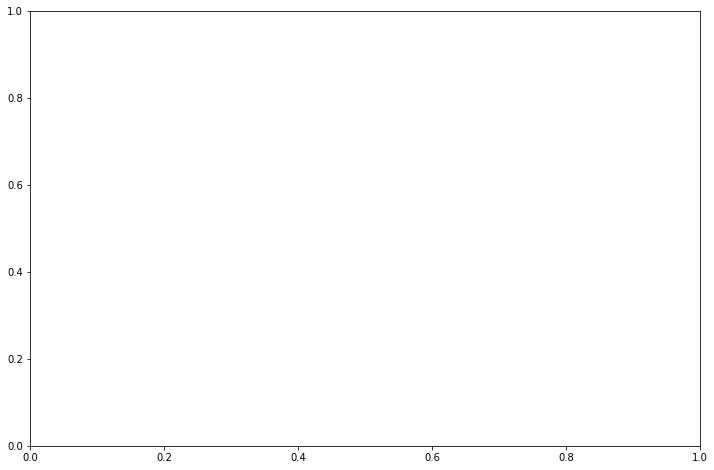

In [21]:
plt.figure(figsize=(12,8))
plt.fill_between(dims, lp, up, alpha=0.3)
plt.plot(dims,av_lengths_2, 'red', linewidth=3)
plt.plot(dims,np.sqrt(dims), 'blue', linewidth=3)
plt.tick_params(labelsize=20)
plt.grid()
plt.savefig('empirical_estimate.png')
plt.show()

In [22]:
corrs = np.corrcoef(array, rowvar=False)

NameError: name 'array' is not defined

In [23]:
import seaborn as sns 
plt.figure(figsize=(10,8))
ax = sns.heatmap((corrs), cmap='Purples')
ax.tick_params(labelsize=50)
plt.xticks([], [])
plt.yticks([], [])
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
plt.savefig('correlations.png')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [44]:
def project_xy(z):
    theta = np.arctan2(z[:,2], z[:,1])
    r = np.sqrt(np.sum(z ** 2, axis = 1))
    return r * np.cos(theta), r * np.sin(theta)

In [45]:
N = 1000
D = 40
mu = np.zeros(D)
Sigma = np.diag(np.ones(D))
z = np.random.multivariate_normal(mu, Sigma, size = N)
x, y = project_xy(z)

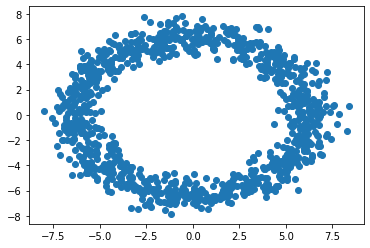

In [46]:
plt.scatter(x, y)